# Problem 1: Numerical solution of the steady-state cable equation

We are supposed to solve the steady cable equation with an injected current at the centre of the cable. In order to get close to the case of an infinite cable we use the sealed end condition. That is in our case V'(-5) = 0.

In [16]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy import integrate, arange

# Plots will be done in the notebook:
%matplotlib inline

First we define the steady state cable equation. However we consider an injected current on an 0.2 mm interval around the point 0 instead of current that is precisely injected at 0. A smaller interval would lead to unwanted numerical effects, no matter how small we choose the spatial grid.

Furthermore we calculate the electronic lenght constant $\lambda$ and B := V(0) from our analytical solution to be able to compare it with the numerical solution later.

In [17]:
I_e = 10 # nA
r_m = 2 # Ohm m
a = 2 # micro m
r_L = 2 # Ohm m
E_L = 0

lamb = np.sqrt(a*r_m/(2*r_L)) # m
B = I_e/2*r_m/(2*np.pi*a*lamb) # V

def steady_cable(y,x):
    
    # notations
    V = y[0]
    dVdx = y[1]
    
    # output vector
    dydx = np.zeros(2)
    
    # Here we determine the input current density
    # on an interval of lengh 0.2 mm around the point 0 (shorter not possible).
    # We use this current density to approximate the case
    # of an current injection at the point 0.
    if x >= -0.1 and x <= 0.1 : # mm
        i_e = I_e/(2*np.pi*a*0.2)
    else:
        i_e = 0
    
    # ODEs
    dydx[0] = dVdx
    dydx[1] = 2*r_L/a*((V-E_L)/r_m-i_e) 
    
    return dydx
    

Now we integrate. We consider a cable of 1 cm length. We choose the initial value V(-5) = 0.0107 which could be close to the correct one.

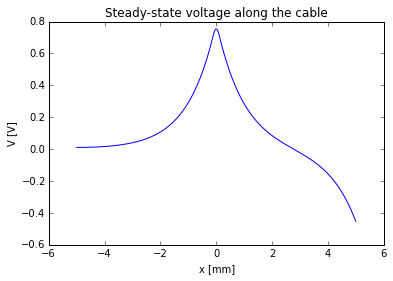

In [18]:
x = np.linspace(-5,5,10001)
y_start = (0.0107, 0)
y = integrate.odeint(steady_cable, y_start, x)
V = y[:,0]

# plot
plt.figure()
plt.title('Steady-state voltage along the cable')
plt.ylabel('V [V]')
plt.xlabel('x [mm]')
plt.plot(x, V)

As we can see the plot is not symmetric. However symmetry is sensible assumption for our problem. The voltage on both sides of the injection site should reveal an coinciding behaviour. Thus we try a slightly larger initial value V(-5) = 0.0108. 

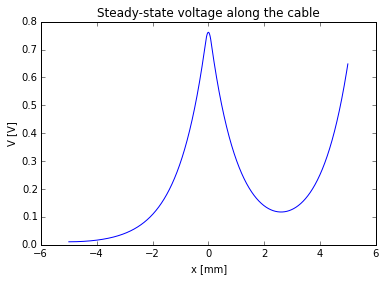

In [13]:
y_start = (0.0108, 0)
y = integrate.odeint(steady_cable, y_start, x)
V = y[:,0]

# plot
plt.figure()
plt.title('Steady-state voltage along the cable')
plt.ylabel('V [V]')
plt.xlabel('x [mm]')
plt.plot(x, V)

This time the initial value is to big. In order to find the correct initial value we use the shooting method. We try different intial values and increase resp. decrease them till we obtain an sufficiently symmetric voltage curve.

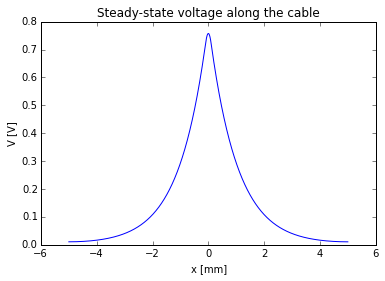

In [14]:
# Now we want to do the same with the shooting method

# first initial value for the voltage at -2
# for the slope we can always take 0, because of our sealed end condition
V_start = 1

# value in order to start the while loop
V_end = 0

for n in range (1,21):
    if V_end > V_start:
        # If we start with a too large value for V_start
        # then V_end will be larger than V_start.
        # So we must decrease the initial value till V_end is smaller than V_start.
        while V_end > V_start:
            # redifine initial value:
            V_start = V_start*(1 - 2**(-n))
            y = integrate.odeint(steady_cable, (V_start, 0), x)
            V_end = y[-1,0]
    else:
        # If we have a too small value for V_start
        # then V_end will be even smaller.
        # So we must increase V_start till V_end is larger than V_start.
        while V_end < V_start:
            # redifine initial value:
            V_start = V_start*(1 + 2**(-n))
            y = integrate.odeint(steady_cable, (V_start, 0), x)
            V_end = y[-1,0]            
        # Since 2**(-n) becomes smaller and smaller, we get closer to the correct solution.
V = y[:,0]
    

# plot
plt.figure()
plt.title('Steady-state voltage along the cable')
plt.ylabel('V [V]')
plt.xlabel('x [mm]')
plt.plot(x, V)

That looks symmetric. We compare this solution with our analytical result now. 

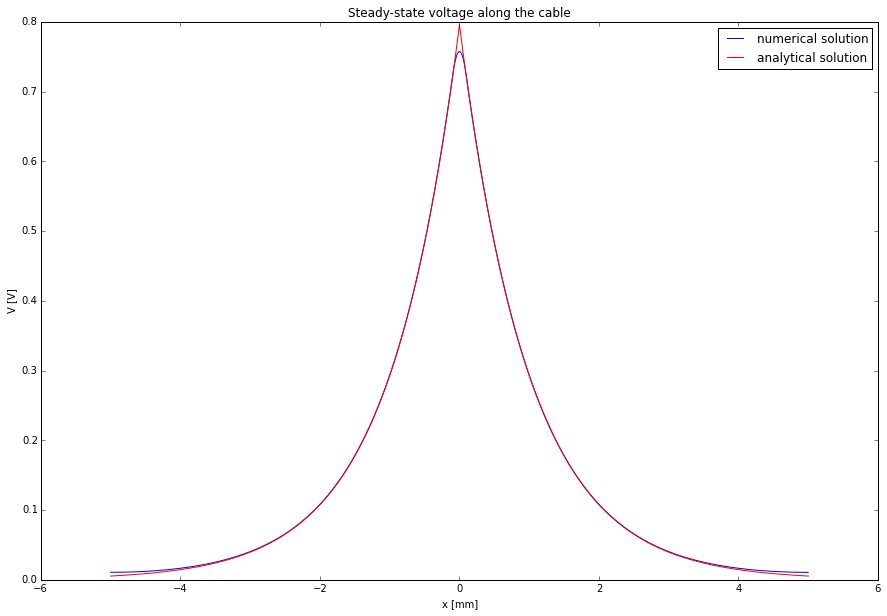

In [15]:
def analytic_solution_scalar(x):
    return B*np.exp(-np.absolute(x)/lamb)
analytic_solution = np.vectorize(analytic_solution_scalar)

V_analytical = analytic_solution(x)

plt.figure(figsize=(15,10))
plt.title('Steady-state voltage along the cable')
plt.ylabel('V [V]')
plt.xlabel('x [mm]')
plt.plot(x, V, color="blue", label="numerical solution")
plt.plot(x, V_analytical, color="red", label="analytical solution")
plt.legend()

We observe that our numerical solution is a bit inaccurate around zero and near the ends of the cable. However this is not a big surprise. After all we simulated a 1 cm long cable with an current injected by an 0.2 mm thick electrode, but we calculated the analytical solution for an infinite cable and a current injected exactly at one point.

In total our numerical solution is accurate enough.